In [1]:
import pandas as pd
import numpy as np
from folktables import ACSDataSource

STATE_CODES = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

ELECTION_DATA = {
    'Alabama': ('R', 28.0), 'Alaska': ('R', 15.2), 'Arizona': ('R', 3.5), 
    'Arkansas': ('R', 26.9), 'California': ('D', 30.1), 'Colorado': ('D', 4.9),
    'Connecticut': ('D', 13.6), 'Delaware': ('D', 11.4), 'Florida': ('R', 1.2),
    'Georgia': ('R', 5.1), 'Hawaii': ('D', 32.2), 'Idaho': ('R', 31.8),
    'Illinois': ('D', 17.1), 'Indiana': ('R', 19.2), 'Iowa': ('R', 9.4),
    'Kansas': ('R', 21.1), 'Kentucky': ('R', 29.8), 'Louisiana': ('R', 19.6),
    'Maine': ('D', 2.9), 'Maryland': ('D', 26.4), 'Massachusetts': ('D', 27.2),
    'Michigan': ('R', 0.2), 'Minnesota': ('D', 1.5), 'Mississippi': ('R', 18.6),
    'Missouri': ('R', 19.1), 'Montana': ('R', 20.4), 'Nebraska': ('R', 25.0),
    'Nevada': ('D', 2.4), 'New Hampshire': ('D', 0.3), 'New Jersey': ('D', 14.1),
    'New Mexico': ('D', 8.3), 'New York': ('D', 22.5), 'North Carolina': ('R', 3.7),
    'North Dakota': ('R', 35.8), 'Ohio': ('R', 8.1), 'Oklahoma': ('R', 36.4),
    'Oregon': ('D', 10.9), 'Pennsylvania': ('R', 0.7), 'Rhode Island': ('D', 15.5),
    'South Carolina': ('R', 14.3), 'South Dakota': ('R', 29.8), 'Tennessee': ('R', 26.0),
    'Texas': ('R', 9.0), 'Utah': ('R', 18.1), 'Vermont': ('D', 26.4),
    'Virginia': ('D', 5.3), 'Washington': ('D', 15.7), 'West Virginia': ('R', 42.2),
    'Wisconsin': ('R', 0.7), 'Wyoming': ('R', 46.3)
}

def get_state_stats(state_data):
    stats = {}
    stats['mean_age'] = state_data['AGEP'].mean()
    stats['pct_over_60'] = (state_data['AGEP'] > 60).mean() * 100
    stats['mean_income'] = state_data['PINCP'].mean()
    stats['pct_high_income'] = (state_data['PINCP'] >= 100000).mean() * 100
    stats['pct_degree'] = (state_data['SCHL'] >= 21).mean() * 100
    stats['pct_white'] = (state_data['RAC1P'] == 1).mean() * 100
    stats['pct_black'] = (state_data['RAC1P'] == 2).mean() * 100
    stats['pct_hispanic'] = (state_data['HISP'] > 1).mean() * 100
    stats['pct_married'] = (state_data['MAR'] == 1).mean() * 100
    stats['pct_employed'] = (state_data['ESR'].isin([1, 2, 4, 5])).mean() * 100
    stats['pct_public_health'] = (state_data['PUBCOV'] == 1).mean() * 100
    stats['pct_military'] = (state_data['MIL'].isin([1, 2, 3])).mean() * 100
    stats['pct_foreign'] = (state_data['NATIVITY'] == 2).mean() * 100
    return stats

def create_state_analysis_df():
    data_source = ACSDataSource(survey_year='2016', horizon='1-Year', survey='person')
    state_stats = {}
    
    for state_code, state_name in STATE_CODES.items():
        print(f"Processing {state_name}")
        state_data = data_source.get_data(states=[state_code], download=True)
        state_stats[state_name] = get_state_stats(state_data)
        state_stats[state_name]['winner'] = ELECTION_DATA[state_name][0]
        state_stats[state_name]['margin'] = ELECTION_DATA[state_name][1] * (-1 if ELECTION_DATA[state_name][0] == 'R' else 1)
        del state_data
    
    stats_df = pd.DataFrame.from_dict(state_stats, orient='index')
    stats_df.index.name = 'State'
    return stats_df.reset_index()

df = create_state_analysis_df()

Processing Alabama
Processing Alaska
Processing Arizona
Processing Arkansas
Processing California
Processing Colorado
Processing Connecticut
Processing Delaware
Processing Florida
Processing Georgia
Processing Hawaii
Processing Idaho
Processing Illinois
Processing Indiana
Processing Iowa
Processing Kansas
Processing Kentucky
Processing Louisiana
Processing Maine
Processing Maryland
Processing Massachusetts
Processing Michigan
Processing Minnesota
Processing Mississippi
Processing Missouri
Processing Montana
Processing Nebraska
Processing Nevada
Processing New Hampshire
Processing New Jersey
Processing New Mexico
Processing New York
Processing North Carolina
Processing North Dakota
Processing Ohio
Processing Oklahoma
Processing Oregon
Processing Pennsylvania
Processing Rhode Island
Processing South Carolina
Processing South Dakota
Processing Tennessee
Processing Texas
Processing Utah
Processing Vermont
Processing Virginia
Processing Washington
Processing West Virginia
Processing Wiscons

In [2]:
df.head()

,State,mean_age,pct_over_60,mean_income,pct_high_income,pct_degree,pct_white,pct_black,pct_hispanic,pct_married,pct_employed,pct_public_health,pct_military,pct_foreign,winner,margin
0,Alabama,42.542752,27.119747,32689.966851,4.528001,18.525357,72.823601,23.021885,2.952223,43.364317,41.446526,39.635746,9.660295,2.801150,R,-28.0
1,Alaska,35.074688,15.348496,37313.396324,6.030814,15.055026,51.019809,1.438004,4.255319,34.688188,42.964050,38.738078,11.239912,5.575935,R,-15.2
2,Arizona,41.010439,25.654259,35653.328037,5.630282,21.598585,75.617708,3.691628,25.803386,41.023129,42.007076,41.414954,9.042662,12.029592,R,-3.5
3,Arkansas,41.688469,26.250887,30163.394745,3.446062,15.777560,80.529748,13.405858,5.158958,43.156863,41.619649,46.430623,9.483428,3.476469,R,-26.9
4,California,39.918162,21.781217,43189.264445,8.967516,25.260149,61.492148,5.007779,34.929461,40.789022,46.097305,39.666254,5.850519,26.369620,D,30.1


In [3]:
df_std = df.copy()
for column in df_std.columns[1:-2]:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()

df_std.head()




,State,mean_age,pct_over_60,mean_income,pct_high_income,pct_degree,pct_white,pct_black,pct_hispanic,pct_married,pct_employed,pct_public_health,pct_military,pct_foreign,winner,margin
0,Alabama,0.588423,0.688358,-1.013491,-0.701219,-0.853707,-0.494893,1.713958,-0.697796,0.023788,-1.515063,0.438008,0.479724,-0.847746,R,-28.0
1,Alaska,-3.474551,-3.647345,-0.156811,0.012862,-1.600882,-2.164148,-0.836054,-0.550482,-3.395996,-1.060052,0.253810,1.538269,-0.369738,R,-15.2
2,Arizona,-0.245226,0.148575,-0.464407,-0.177456,-0.192029,-0.280982,-0.569801,1.885514,-0.899015,-1.346989,0.803095,0.065832,0.742024,R,-3.5
3,Arkansas,0.123654,0.368331,-1.481641,-1.215315,-1.445318,0.095073,0.577880,-0.448326,-0.057982,-1.463154,1.832292,0.361201,-0.731410,R,-26.9
4,California,-0.839476,-1.277982,0.931933,1.408272,0.596320,-1.362407,-0.414306,2.917211,-0.991291,-0.120584,0.444269,-2.073311,3.212360,D,30.1


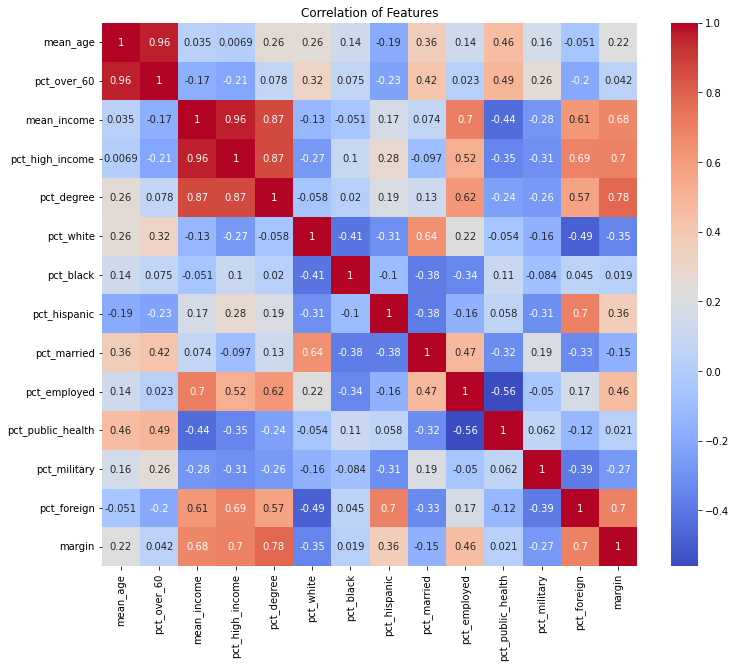

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_std.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features')
plt.show()


/home/parjanya/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/parjanya/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


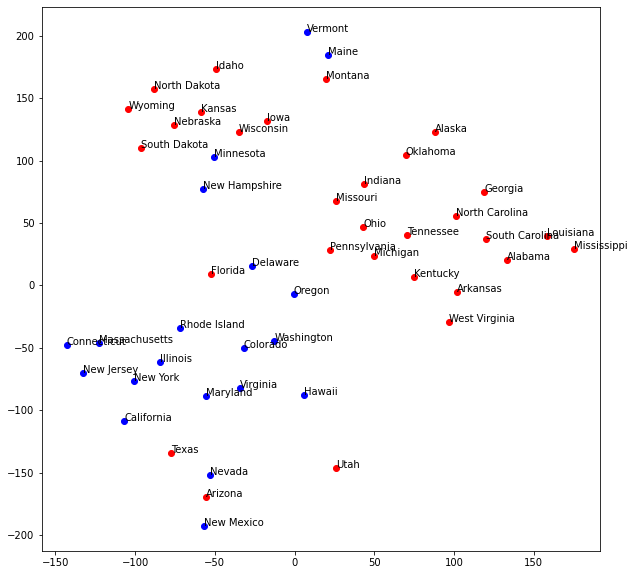

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, perplexity=8)
states_2d = tsne.fit_transform(df_std.iloc[:, 1:-2])

plt.figure(figsize=(10, 10))
plt.scatter(states_2d[df['winner'] == 'R', 0], states_2d[df['winner'] == 'R', 1], color='red')
plt.scatter(states_2d[df['winner'] == 'D', 0], states_2d[df['winner'] == 'D', 1], color='blue')

for i, state in enumerate(df['State']):
    plt.text(states_2d[i, 0], states_2d[i, 1], state)

plt.show()


In [6]:
corrs = df.corrwith(df['margin']).sort_values(ascending=False)
print(corrs)


margin               1.000000
pct_degree           0.781602
pct_high_income      0.699254
pct_foreign          0.696231
mean_income          0.678315
pct_employed         0.455246
pct_hispanic         0.362133
mean_age             0.217890
pct_over_60          0.041744
pct_public_health    0.020627
pct_black            0.019153
pct_married         -0.154529
pct_military        -0.269196
pct_white           -0.352861
dtype: float64


In [7]:
from scipy.stats import ttest_ind
R = df[df['winner']=='R']
D = df[df['winner']=='D']
features = [c for c in df.columns if c not in ['winner','margin','State']]
for f in features:
    stat, p = ttest_ind(R[f],D[f],equal_var=False)
    print(f, "reject" if p<0.05 else "accept")


mean_age accept
pct_over_60 accept
mean_income reject
pct_high_income reject
pct_degree reject
pct_white accept
pct_black accept
pct_hispanic accept
pct_married accept
pct_employed reject
pct_public_health accept
pct_military accept
pct_foreign reject


In [8]:
import numpy as np
import statsmodels.api as sm

Xvars = [c for c in df.columns if c not in ['winner','margin','State']]
pairs = [('mean_age','pct_over_60'),('pct_over_60','mean_age'),('mean_income','pct_high_income'),('pct_high_income','mean_income')]
ate_results = []
for t in Xvars:
    conf = [x for x in Xvars if x!=t]
    for a,b in pairs:
        if t==a and b in conf:
            conf.remove(b)
    treatment = (df[t] > df[t].median()).astype(int)
    X = df[conf]
    X = sm.add_constant(pd.concat([X,treatment],axis=1))
    model = sm.OLS(df['margin'],X).fit()
    ate = model.params[treatment.name]
    ate_results.append((t,ate))
ate_results.sort(key=lambda x: abs(x[1]),reverse=True)
for res in ate_results:
    print(res)


('pct_foreign', 12.76607311696132)
('pct_degree', 12.590771166173806)
('mean_income', 8.453173692272742)
('pct_public_health', 6.945733019738364)
('pct_military', -6.100894614649798)
('pct_white', -5.978616760472392)
('pct_hispanic', -5.063162658629503)
('pct_employed', 4.963030674684741)
('pct_high_income', 3.9201505239207153)
('pct_married', 2.838356086224103)
('pct_over_60', 2.5534325358912167)
('mean_age', 1.4118375482309)
('pct_black', 0.8613388930839816)


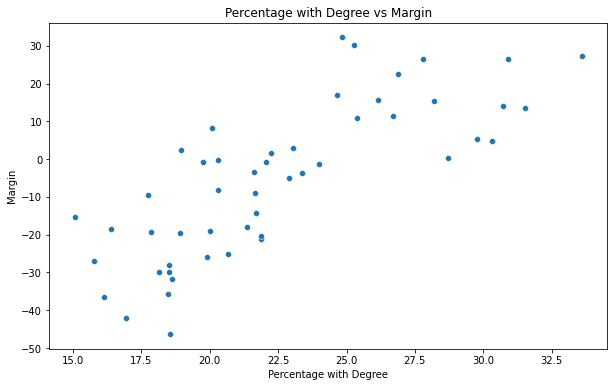

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pct_degree', y='margin', data=df)
plt.title('Percentage with Degree vs Margin')
plt.xlabel('Percentage with Degree')
plt.ylabel('Margin')
plt.show()


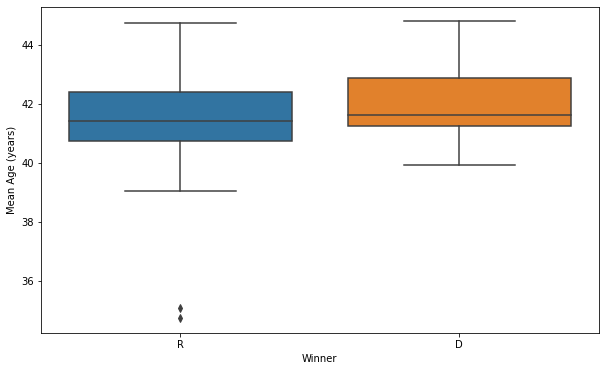

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='winner', y='mean_age', data=df)
plt.title('')
plt.xlabel('Winner')
plt.ylabel('Mean Age (years)')
plt.show()


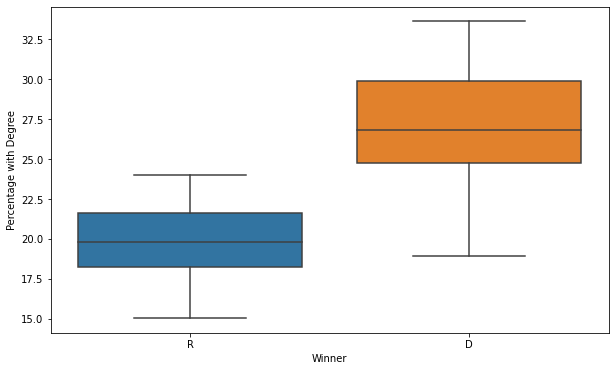

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='winner', y='pct_degree', data=df)
plt.title('')
plt.xlabel('Winner')
plt.ylabel('Percentage with Degree')
plt.show()
